In [88]:
!pip install bertopic[visualization]
!pip install transformers
!pip install -U bertopic[visualization]


In [89]:
import bertopic
print(bertopic.__version__)


0.17.0


In [81]:
from google.colab import files
uploaded = files.upload()



Saving Diverse_Policy_Statements.csv to Diverse_Policy_Statements (3).csv


In [90]:
import pandas as pd

df = pd.read_csv("Diverse_Policy_Statements.csv")  # dosya adını kendi dosyana göre değiştir
documents = df["Diverse Policy Statements"].tolist()

print(documents[:5])

['Public-private partnerships were formed in biotech research.', 'The pension age was lowered to address unemployment rates.', 'Tariffs on imported steel were lifted to reduce manufacturing costs.', 'Funding for 5G infrastructure development was approved.', 'Job training programs were expanded for displaced workers.']


In [91]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer("all-mpnet-base-v2")
umap_model = UMAP(n_neighbors=5, n_components=5, min_dist=0.1, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='eom')

topic_model = BERTopic(embedding_model=embedding_model, umap_model=umap_model, hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(documents)


In [67]:
# Show the top words in each discovered topic
topic_info = topic_model.get_topic_info()
topic_info.head()
topic_model.get_topic_info()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,2,-1_corporate_simplify_taxation_fossil,"[corporate, simplify, taxation, fossil, 2025, ...",[Subsidies for fossil fuels were phased out by...
1,0,10,0_low_families_housing_income,"[low, families, housing, income, program, laun...",[A housing program was launched for low-income...
2,1,10,1_wage_improve_living_minimum,"[wage, improve, living, minimum, raised, stand...",[The minimum wage was raised to improve living...
3,2,9,2_training_programs_displaced_job,"[training, programs, displaced, job, workers, ...",[Job training programs were expanded for displ...
4,3,8,3_partnerships_private_biotech_formed,"[partnerships, private, biotech, formed, resea...",[Public-private partnerships were formed in bi...
5,4,8,4_pension_address_age_lowered,"[pension, address, age, lowered, unemployment,...",[The pension age was lowered to address unempl...
6,5,7,5_ministry_restructuring_debt_finance,"[ministry, restructuring, debt, finance, of, l...",[The ministry of finance launched a debt restr...
7,6,7,6_inflation_interest_central_combat,"[inflation, interest, central, combat, bank, r...",[The central bank increased interest rates to ...
8,7,7,7_adopted_curriculum_all_digital,"[adopted, curriculum, all, digital, high, dist...",[Digital learning tools were distributed to al...
9,8,7,8_negotiated_collective_unions_agreements,"[negotiated, collective, unions, agreements, l...",[Labor unions negotiated new collective agreem...


In [68]:
# Reduce clusters to 10 topics
topic_model_reduced = topic_model.reduce_topics(documents, nr_topics=10)

# Get info of new topics
reduced_topic_info = topic_model_reduced.get_topic_info()
reduced_topic_info.head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2,-1_corporate_simplify_taxation_fossil,"[corporate, simplify, taxation, fossil, 2025, ...",[Subsidies for fossil fuels were phased out by...
1,0,45,0_increased_the_raised_education,"[increased, the, raised, education, funding, m...",[The minimum wage was raised to improve living...
2,1,30,1_expanded_workers_extended_job,"[expanded, workers, extended, job, programs, t...",[Job training programs were expanded for displ...
3,2,30,2_tax_subsidies_introduced_2025,"[tax, subsidies, introduced, 2025, fuels, phas...",[Subsidies for fossil fuels were phased out by...
4,3,26,3_research_in_formed_biotech,"[research, in, formed, biotech, partnerships, ...",[Public-private partnerships were formed in bi...
5,4,24,4_agreements_collective_costs_manufacturing,"[agreements, collective, costs, manufacturing,...",[Tariffs on imported steel were lifted to redu...
6,5,23,5_schools_families_housing_low,"[schools, families, housing, low, income, scho...",[A housing program was launched for low-income...
7,6,8,6_pension_address_age_lowered,"[pension, address, age, lowered, unemployment,...",[The pension age was lowered to address unempl...
8,7,7,7_ministry_restructuring_debt_finance,"[ministry, restructuring, debt, finance, of, l...",[The ministry of finance launched a debt restr...
9,8,5,8_from_non_sanctions_states,"[from, non, sanctions, states, imposed, compli...",[Sanctions were imposed on goods from non-comp...


In [69]:
import pandas as pd

# Get topic labels
topic_labels = topic_model.get_topic_info()

# Create DataFrame of document-topic mappings
doc_topics_df = pd.DataFrame({
    "Document": documents,
    "Assigned Topic": topics
})

# Merge with topic labels to show top keywords
doc_topics_df = doc_topics_df.merge(topic_labels[["Topic", "Name"]], left_on="Assigned Topic", right_on="Topic", how="left")
doc_topics_df.drop(columns=["Topic"], inplace=True)

doc_topics_df.head(10)


,Document,Assigned Topic,Name
0,Public-private partnerships were formed in bio...,3,3_research_in_formed_biotech
1,The pension age was lowered to address unemplo...,4,4_agreements_collective_costs_manufacturing
2,Tariffs on imported steel were lifted to reduc...,9,NaN
3,Funding for 5G infrastructure development was ...,16,NaN
4,Job training programs were expanded for displa...,2,2_tax_subsidies_introduced_2025
5,A carbon tax was implemented to reduce greenho...,22,NaN
6,Defense spending was increased due to regional...,21,NaN
7,Parental leave policies were extended to self-...,20,NaN
8,Unemployment benefits were extended during the...,12,NaN
9,Research grants were awarded to AI and robotic...,17,NaN


In [70]:
import pandas as pd

# Get which topic the documents are assigned to
doc_topics = topics  # Topic IDs assigned by BERTopic

# Merge documents with topics
doc_topics_df = pd.DataFrame({
    "Document": documents,
    "Assigned Topic": doc_topics
})

# Get topic titles
topic_info = topic_model.get_topic_info()

# Only pull the 'Name' column which is the name of the topic
topic_names = topic_info[["Topic", "Name"]]

# Match documents with subject names
doc_topics_df = doc_topics_df.merge(topic_names, left_on="Assigned Topic", right_on="Topic", how="left")

# Remove Topic column if necessary
doc_topics_df.drop(columns=["Topic"], inplace=True)


doc_topics_df.head(10)


,Document,Assigned Topic,Name
0,Public-private partnerships were formed in bio...,3,3_research_in_formed_biotech
1,The pension age was lowered to address unemplo...,4,4_agreements_collective_costs_manufacturing
2,Tariffs on imported steel were lifted to reduc...,9,NaN
3,Funding for 5G infrastructure development was ...,16,NaN
4,Job training programs were expanded for displa...,2,2_tax_subsidies_introduced_2025
5,A carbon tax was implemented to reduce greenho...,22,NaN
6,Defense spending was increased due to regional...,21,NaN
7,Parental leave policies were extended to self-...,20,NaN
8,Unemployment benefits were extended during the...,12,NaN
9,Research grants were awarded to AI and robotic...,17,NaN


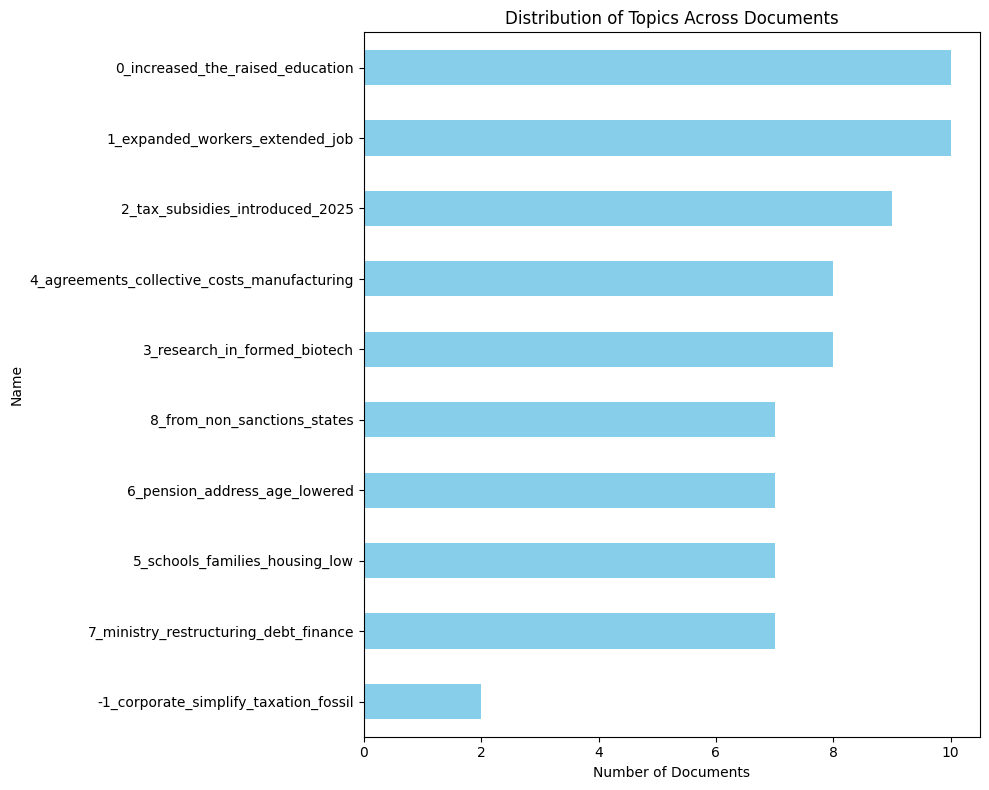

In [71]:
import matplotlib.pyplot as plt

# Count how many times topics are assigned
topic_counts = doc_topics_df["Name"].value_counts().sort_values(ascending=True)

# Create bar chart
plt.figure(figsize=(10, 8))
topic_counts.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Documents")
plt.title("Distribution of Topics Across Documents")
plt.tight_layout()
plt.show()


In [72]:
# Show summary for first 5 topics
for topic_id in topic_info.Topic[1:6]:  # -1 outlier olduğu için atlıyoruz
    print(f"\n--- Topic {topic_id} ---")
    print("Top Words:", topic_info.loc[topic_info.Topic == topic_id, "Representation"].values[0])
    print("Representative Docs:")
    rep_docs = topic_info.loc[topic_info.Topic == topic_id, "Representative_Docs"].values[0]

    # If the document is a list, print the first 2
    if isinstance(rep_docs, list):
        for doc in rep_docs[:2]:
            print("-", doc.strip())
    else:
        print("-", rep_docs)



--- Topic 0 ---
Top Words: ['increased', 'the', 'raised', 'education', 'funding', 'minimum', 'improve', 'wage', 'living', 'to']
Representative Docs:
- The minimum wage was raised to improve living standards.
- The minimum wage was raised to improve living standards.

--- Topic 1 ---
Top Words: ['expanded', 'workers', 'extended', 'job', 'programs', 'training', 'displaced', 'were', 'during', 'crisis']
Representative Docs:
- Job training programs were expanded for displaced workers.
- Job training programs were expanded for displaced workers.

--- Topic 2 ---
Top Words: ['tax', 'subsidies', 'introduced', '2025', 'fuels', 'phased', 'fossil', 'out', 'to', 'by']
Representative Docs:
- Subsidies for fossil fuels were phased out by 2025.
- Subsidies for fossil fuels were phased out by 2025.

--- Topic 3 ---
Top Words: ['research', 'in', 'formed', 'biotech', 'partnerships', 'private', 'public', 'and', 'approved', 'capital']
Representative Docs:
- Public-private partnerships were formed in biot

In [73]:
#Intertopic distance map for reduced model
topic_model_reduced.visualize_topics()


In [74]:
#topic word score
topic_model_reduced.visualize_barchart(top_n_topics=10)


In [75]:
#Docs and topics
topic_model_reduced.visualize_documents(documents)


In [77]:
from transformers import pipeline

# Load summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Get topic info and representative documents
topic_info = topic_model.get_topic_info()
summaries = {}

for topic_id in topic_info['Topic'].tolist():
    if topic_id == -1:  # skip outliers
        continue

    # Get top 3 representative docs
    docs = topic_info.loc[topic_info.Topic == topic_id, "Representative_Docs"].values[0][:3]

    # Join them into a single input text
    input_text = " ".join(docs)

    # Ensure input text is within model limits (BART allows ~1024 tokens)
    input_text = input_text[:1024]

    # Generate summary
    summary = summarizer(input_text, max_length=80, min_length=30, do_sample=False)[0]['summary_text']

    # Save summary
    summaries[topic_id] = summary

# Display
for tid, text in summaries.items():
    print(f"--- Topic {tid} ---\nSummary: {text}\n")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 80, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 80, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 80, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 80, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', m

--- Topic 0 ---
Summary: The minimum wage was raised to improve living standards. The minimum wage has been raised from £10 to £10.50 per hour for men and £5.50 for women.

--- Topic 1 ---
Summary: Job training programs expanded for displaced workers. Job training programs were expanded for workers displaced by natural disasters. Job Training Programs were Expanded for Workers Displaced by Natural disasters.

--- Topic 2 ---
Summary: Subsidies for fossil fuels were phased out by 2025. Subsidies to be phased out for all fossil fuels by 2025, including gas, electricity, and water.

--- Topic 3 ---
Summary: Public-private partnerships were formed in biotech research. Public-private partnerships were formed to help research in the field of biotechnology.

--- Topic 4 ---
Summary: Tariffs on imported steel were lifted to reduce manufacturing costs. The move was intended to reduce the cost of manufacturing in the U.S. and around the world.

--- Topic 5 ---
Summary: A housing program was laun